In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import rebound
import CreateMovie as movie
from matplotlib.patches import Circle
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter
from scipy.interpolate import interp1d
from RV_stab_grey import *
import scipy.optimize as op
import emcee
import corner
from numpy.fft import rfft,irfft
from scipy.optimize import curve_fit

%matplotlib inline
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.borderpad'] = 0.5
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 18
mpl.rcParams['legend.numpoints'] = 1
plt.rc('lines', linewidth=1.0)
colors = ['4D4D4D','5DA5DA', 'FAA43A', '60BD68', 'F17CB0','B2912F','B276B2','DECF3F','F15854']
                                #  (blue)
                                # (orange)
                                # (green)
                                # (pink)
                                #  (brown)
                                # (purple)
                                #  (yellow)
                                # (red)
                                # ']
mpl.rcParams['axes.color_cycle'] = colors

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


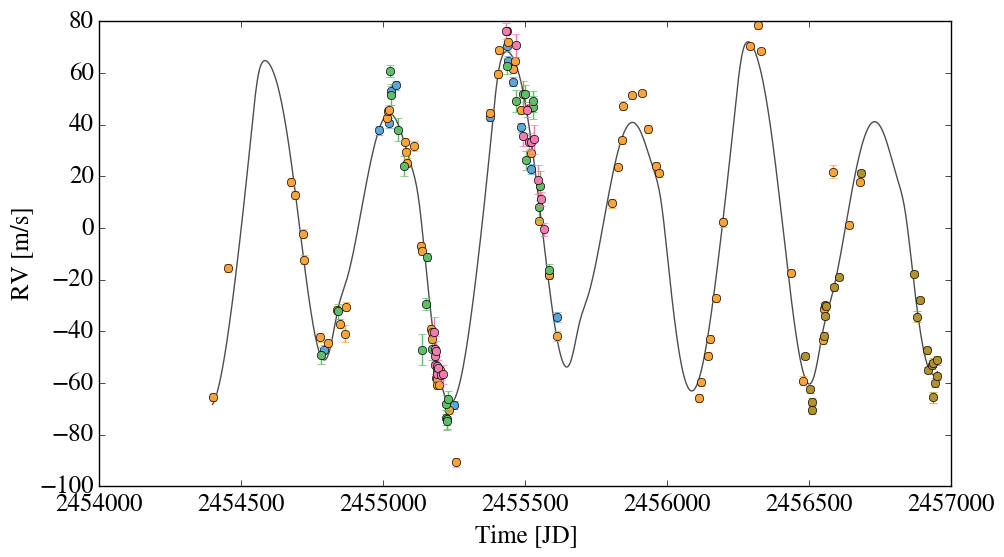

In [2]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

new_params = np.loadtxt('opt_per_mass_from_rmc')
ecc_tmp = np.loadtxt('ecc_tmp')
ang_params = np.loadtxt('ang_params')
offsets = np.loadtxt('offsets_better')
# offsets = result.x
ecc = [0.03,0,0.37]

HD1502.add_planet(per = new_params[0], mass = new_params[1] , M = ang_params[1], e=ecc[0], pomega = ang_params[2])
HD1502.add_planet(per = new_params[2], mass = new_params[3], M = ang_params[3], e=ecc[1], pomega = ang_params[4])

phi = ang_params[0]
lam_3 = 146.84729
pomega_3 = (3*HD1502.planets[0].l - 2*lam_3 - phi)%360.
M_3 = (lam_3 - pomega_3)%360.

HD1502.add_planet(per = new_params[4], mass = new_params[5], M = M_3, e=ecc[2], pomega = pomega_3)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = offsets
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

In [3]:
HD1502.calc_chi2(epoch=epoch)/(152-20)

26.143388108530619

 0 %
Integration took 288.60613 seconds
Energy Error is 0.000% 
Planet 2 went unstable


0

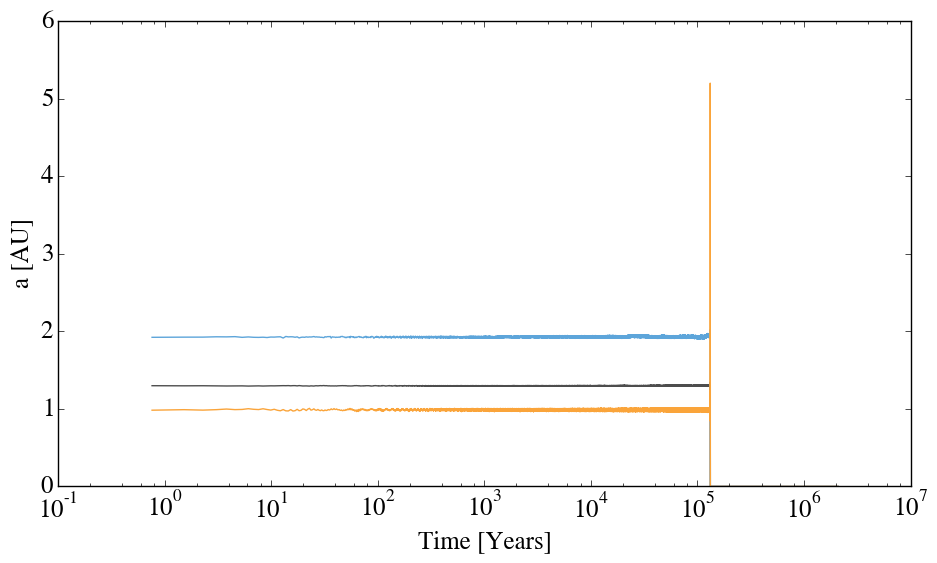

In [55]:
HD1502.orbit_stab(periods=1e6,pnts_per_period=20,outputs_per_period=1,verbose=1,integrator='ias15',safe=1
                  ,timing=1,plot=1,energy_err=1)

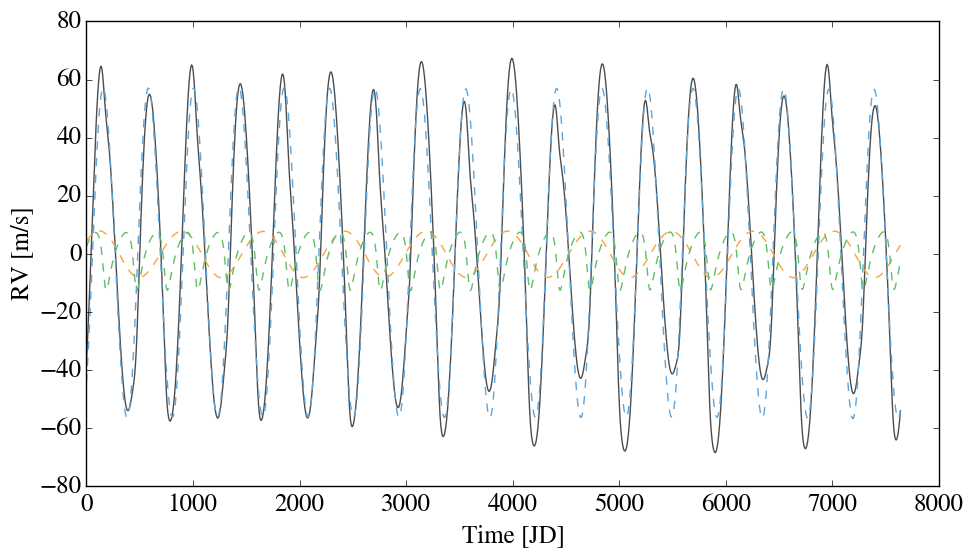

In [3]:
HD1502.plot_planet_RV(epoch=epoch)

# Optimize over mass and $\lambda$

In [4]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

new_params = np.loadtxt('opt_per_mass_from_rmc')
ecc_tmp = np.loadtxt('ecc_tmp')
ang_params = np.loadtxt('ang_params')
offsets = np.loadtxt('offsets_better')
# offsets = result.x
ecc = [0.03,0,0.37]


# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = offsets
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"


In [6]:
def opt_mass_lam(params):
    
    mass_0, mass_1, mass_2, lam_0, lam_1, lam_2 = params
            
    HD1502 = RVSystem(mstar = 1.61)
    epoch = 2454410.0

    HD1502.clear_planets()

    new_params = np.loadtxt('opt_per_mass_from_rmc')
    ecc_tmp = np.loadtxt('ecc_tmp')
    ang_params = np.loadtxt('ang_params')
    offsets = np.loadtxt('offsets_better')
    ecc = [0.03,0,0.37]

    M_0 = lam_0 - ang_params[2]
    M_1 = lam_1 - ang_params[4]
    
    HD1502.add_planet(per = new_params[0], mass = mass_0 , M = M_0, e=ecc[0], pomega = ang_params[2])
    HD1502.add_planet(per = new_params[2], mass = mass_1, M = M_1, e=ecc[1], pomega = ang_params[4])

    phi = ang_params[0]
#     lam_3 = 146.84729
    pomega_2 = (3*HD1502.planets[0].l - 2*lam_2 - phi)
    M_2 = (lam_2 - pomega_2)

    HD1502.add_planet(per = new_params[4], mass = mass_2, M = M_2, e=ecc[2], pomega = pomega_2)

    # HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
    # HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
    # HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


    HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
    HD1502.offsets = offsets
    # HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
    HD1502.path_to_data = "/Applications/Systemic/datafiles/"
    
    return -HD1502.stab_logprob(epoch=epoch,pnts_per_period=20)

In [8]:
params = [new_params[1],new_params[3],new_params[5],ang_params[1]+ang_params[2],ang_params[3]+ang_params[4],146.84729]
opt_mass_lam(params)

1967.6482387004694

In [9]:
t_0 = time.time()
result = op.minimize(opt_mass_lam,params)
print "That took  %.3f seconds" %(time.time()-t_0)

That took  2639.188 seconds


In [10]:
result.x

array([   2.93637381,    0.49576341,    0.39400298,  201.48709625,
        194.11145684,  146.9146596 ])

In [12]:
np.savetxt('lambas_mass_opt',result.x)

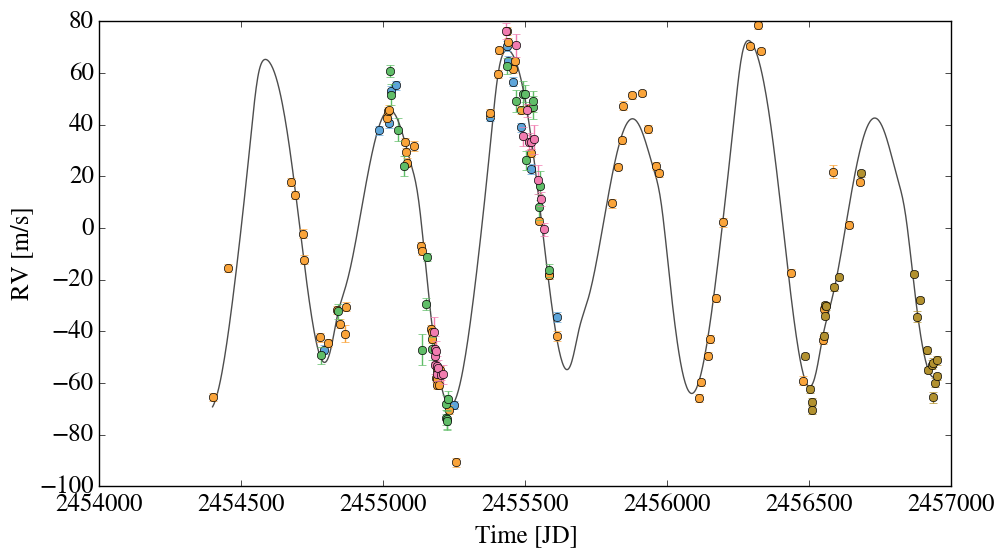

In [14]:
params = result.x

mass_0, mass_1, mass_2, lam_0, lam_1, lam_2 = params

HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

new_params = np.loadtxt('opt_per_mass_from_rmc')
ecc_tmp = np.loadtxt('ecc_tmp')
ang_params = np.loadtxt('ang_params')
offsets = np.loadtxt('offsets_better')
ecc = [0.03,0,0.37]

M_0 = lam_0 - ang_params[2]
M_1 = lam_1 - ang_params[4]

HD1502.add_planet(per = new_params[0], mass = mass_0 , M = M_0, e=ecc[0], pomega = ang_params[2])
HD1502.add_planet(per = new_params[2], mass = mass_1, M = M_1, e=ecc[1], pomega = ang_params[4])

phi = ang_params[0]
#     lam_3 = 146.84729
pomega_2 = (3*HD1502.planets[0].l - 2*lam_2 - phi)
M_2 = (lam_2 - pomega_2)

HD1502.add_planet(per = new_params[4], mass = mass_2, M = M_2, e=ecc[2], pomega = pomega_2)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = offsets
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

In [16]:
HD1502.calc_chi2(epoch=epoch)/(152-20)

25.743572409252394

# Try with different ICs

In [17]:
params = [new_params[1],new_params[3],new_params[5],ang_params[1]+ang_params[2],ang_params[3]+ang_params[4]+180,146.84729]
opt_mass_lam(params)

5982.6544764835799

In [23]:
bounds = [(0.1,None),(0.1,None),(0.1,None),(None,None),(None,None),(None,None)]

t_0 = time.time()
result = op.minimize(opt_mass_lam,params,bounds=bounds)
print "That took  %.3f seconds" %(time.time()-t_0)

That took  893.046 seconds


In [24]:
result.x

array([  2.99990355e+00,   1.00000000e-01,   3.53046058e-01,
         2.01447546e+02,   3.74046565e+02,   1.46672818e+02])

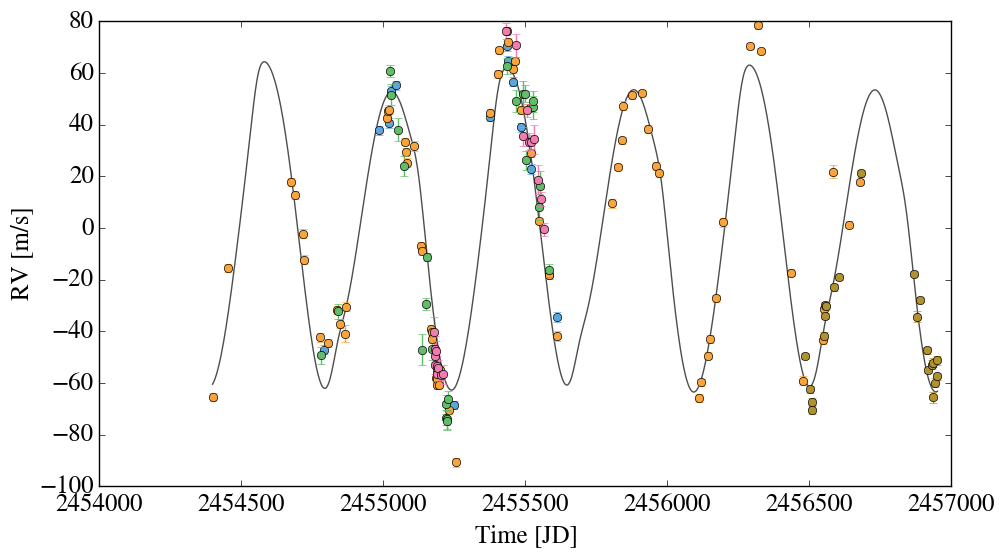

In [25]:
params = result.x

mass_0, mass_1, mass_2, lam_0, lam_1, lam_2 = params

HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

new_params = np.loadtxt('opt_per_mass_from_rmc')
ecc_tmp = np.loadtxt('ecc_tmp')
ang_params = np.loadtxt('ang_params')
offsets = np.loadtxt('offsets_better')
ecc = [0.03,0,0.37]

M_0 = lam_0 - ang_params[2]
M_1 = lam_1 - ang_params[4]

HD1502.add_planet(per = new_params[0], mass = mass_0 , M = M_0, e=ecc[0], pomega = ang_params[2])
HD1502.add_planet(per = new_params[2], mass = mass_1, M = M_1, e=ecc[1], pomega = ang_params[4])

phi = ang_params[0]
#     lam_3 = 146.84729
pomega_2 = (3*HD1502.planets[0].l - 2*lam_2 - phi)
M_2 = (lam_2 - pomega_2)

HD1502.add_planet(per = new_params[4], mass = mass_2, M = M_2, e=ecc[2], pomega = pomega_2)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = offsets
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

In [27]:
HD1502.calc_chi2(epoch=epoch)/(152-20)

46.154477637024662

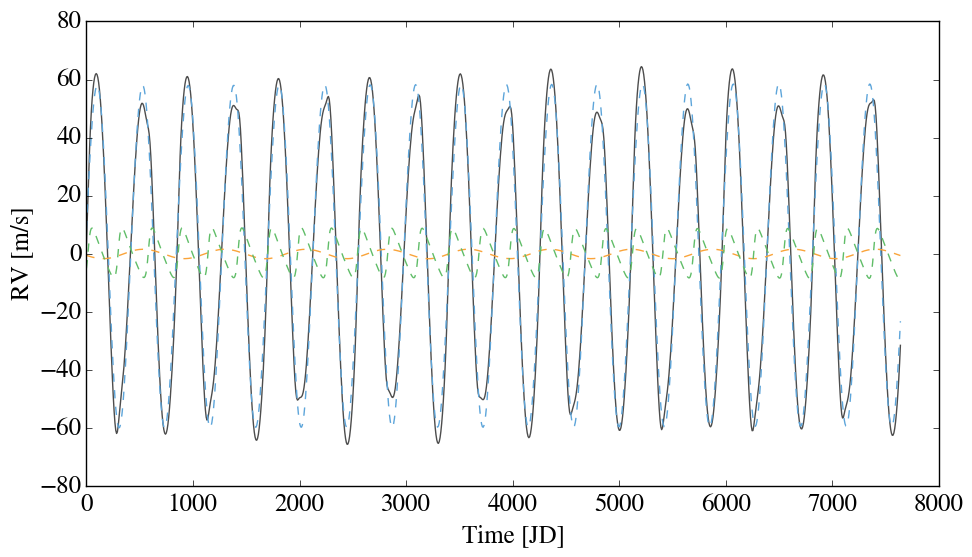

In [28]:
HD1502.plot_planet_RV(epoch=epoch)

# Try with different ICs, Fitting Eccentricity

In [30]:
def opt_mass_lam_ecc(params):
    
    mass_0, mass_1, mass_2, lam_0, lam_1, lam_2, log_e_0, log_e_1, log_e_2 = params
            
    HD1502 = RVSystem(mstar = 1.61)
    epoch = 2454410.0

    HD1502.clear_planets()

    new_params = np.loadtxt('opt_per_mass_from_rmc')
#     ecc_tmp = np.loadtxt('ecc_tmp')
    ang_params = np.loadtxt('ang_params')
    offsets = np.loadtxt('offsets_better')
    ecc = [0.03,0,0.37]

    M_0 = lam_0 - ang_params[2]
    M_1 = lam_1 - ang_params[4]
    
    HD1502.add_planet(per = new_params[0], mass = mass_0 , M = M_0, e=10**(log_e_0), pomega = ang_params[2])
    HD1502.add_planet(per = new_params[2], mass = mass_1, M = M_1, e=10**(log_e_1), pomega = ang_params[4])

    phi = ang_params[0]
#     lam_3 = 146.84729
    pomega_2 = (3*HD1502.planets[0].l - 2*lam_2 - phi)
    M_2 = (lam_2 - pomega_2)

    HD1502.add_planet(per = new_params[4], mass = mass_2, M = M_2, e=10**(log_e_2), pomega = pomega_2)

    # HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
    # HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
    # HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


    HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
    HD1502.offsets = offsets
    # HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
    HD1502.path_to_data = "/Applications/Systemic/datafiles/"
    
    return -HD1502.stab_logprob(epoch=epoch,pnts_per_period=20)

In [38]:
params = [new_params[1],new_params[3],new_params[5],ang_params[1]+ang_params[2],
          ang_params[3]+ang_params[4]+180,146.84729,np.log10(ecc[0]),-4,np.log10(ecc[2])]
opt_mass_lam_ecc(params)

5982.7041806747675

In [39]:
bounds = [(0.1,None),(0.1,None),(0.1,None),(None,None),(None,None),(None,None),(None,-0.2),(None,-0.2),(None,-0.2)]

t_0 = time.time()
result = op.minimize(opt_mass_lam_ecc,params,bounds=bounds)
print "That took  %.3f seconds" %(time.time()-t_0)

RV_stab.py:307: RuntimeWarning: invalid value encountered in absolute
  if (np.abs((a0[k]-planet.a)/a0[k])>1) or planet.a < 0.1:
//anaconda/lib/python2.7/site-packages/rebound/simulation.py:449: RuntimeWarning: At least 10 predictor corrector loops in IAS15 did not converge. This is typically an indication of the timestep being too large.
  warnings.warn(msg[1:], RuntimeWarning)


That took  1415.063 seconds


In [40]:
result.x

array([   2.87887973,    0.49242079,    0.4167619 ,  201.56566752,
        374.1484481 ,  146.84729   ,   -1.52287875,   -4.        ,
         -0.43179828])

In [41]:
params

[2.8788797293639918,
 0.49242079462244215,
 0.41676190180464984,
 201.56566752054749,
 374.14844810261991,
 146.84729,
 -1.5228787452803376,
 -4,
 -0.43179827593300502]

# Parameters from Greymalkin

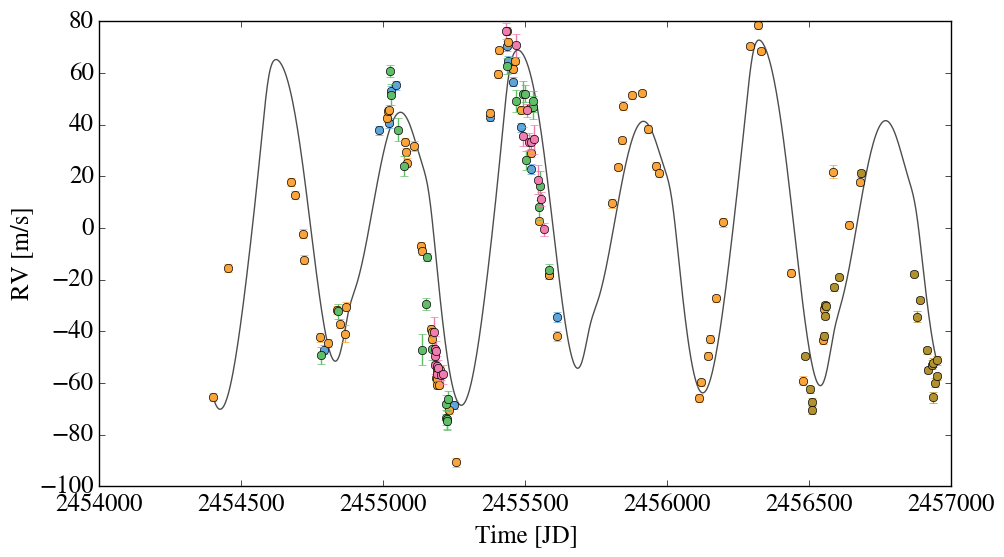

In [4]:
params = [2.91,0.50,0.42,201.95,193.82,147.85,-1.52,-3.99,-0.43]

mass_0, mass_1, mass_2, lam_0, lam_1, lam_2, log_e_0, log_e_1, log_e_2 = params

HD1502 = RVSystem(mstar = 1.61)
epoch = 2454449.23

HD1502.clear_planets()

new_params = np.loadtxt('opt_per_mass_from_rmc')
# ecc_tmp = np.loadtxt('ecc_tmp')
ang_params = np.loadtxt('ang_params')
offsets = np.loadtxt('offsets_better')
ecc = [0.03,0,0.37]

M_0 = lam_0 - ang_params[2]
M_1 = lam_1 - ang_params[4]

HD1502.add_planet(per = new_params[0], mass = mass_0 , M = M_0, e=10**(log_e_0), pomega = ang_params[2])
HD1502.add_planet(per = new_params[2], mass = mass_1, M = M_1, e=10**(log_e_1), pomega = ang_params[4])

phi = ang_params[0]
#     lam_3 = 146.84729
pomega_2 = (3*HD1502.planets[0].l - 2*lam_2 - phi)
M_2 = (lam_2 - pomega_2)

HD1502.add_planet(per = new_params[4], mass = mass_2, M = M_2, e=10**(log_e_2), pomega = pomega_2)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = offsets
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

In [46]:
HD1502.calc_chi2(epoch=epoch)/(152-20)

26.184083479995316

 0 %
 9 %
Integration took 4.29893 seconds
Energy Error is 39.579% 
Planet 1 went unstable


0

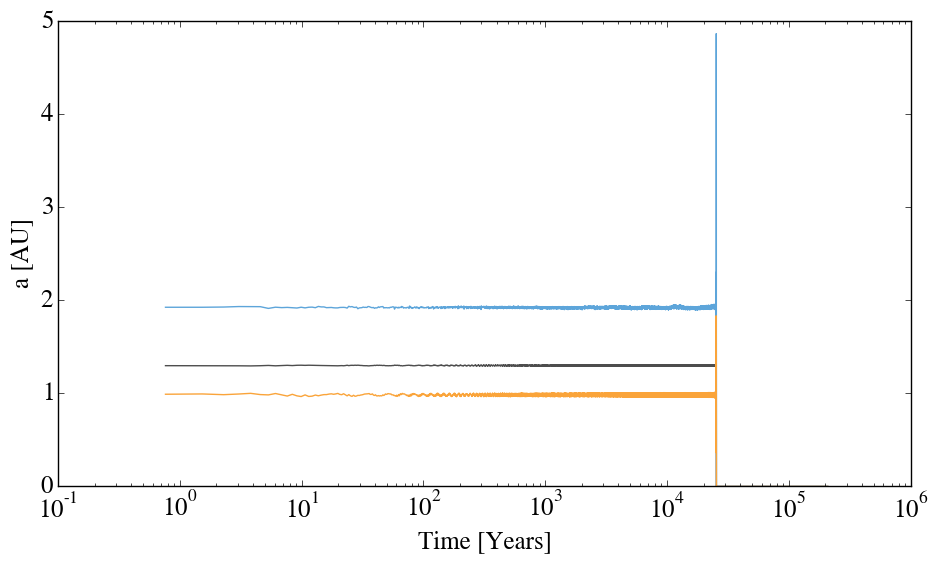

In [48]:
HD1502.orbit_stab(periods=1e5,pnts_per_period=20,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)

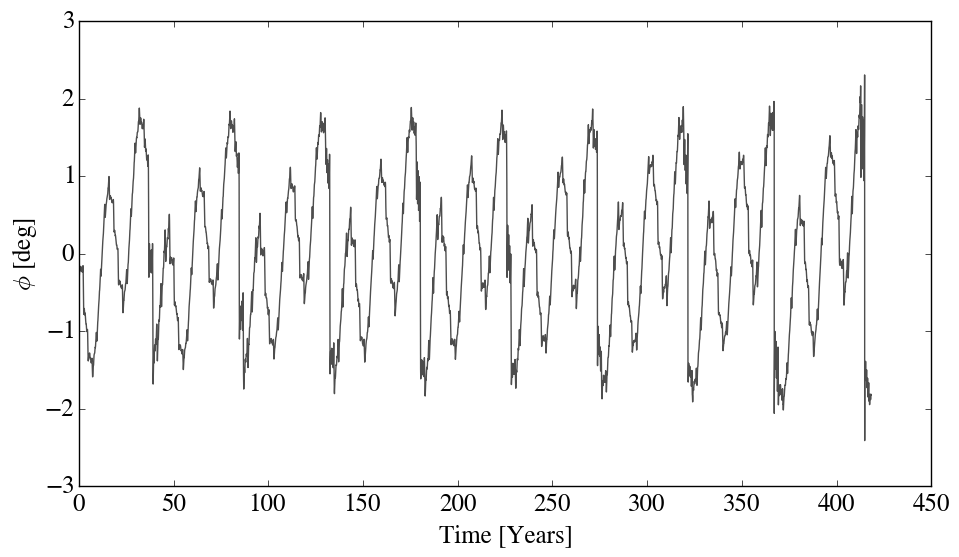

In [49]:
HD1502.plot_phi(pert_ind=0,test_ind=2,p=2,q=1,periods=200)

In [56]:
new_params

array([  4.27572481e+02,   2.87887973e+00,   7.63857742e+02,
         4.92420795e-01,   2.78659908e+02,   4.16761902e-01])

# Check Keplerian vs. Integrated

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


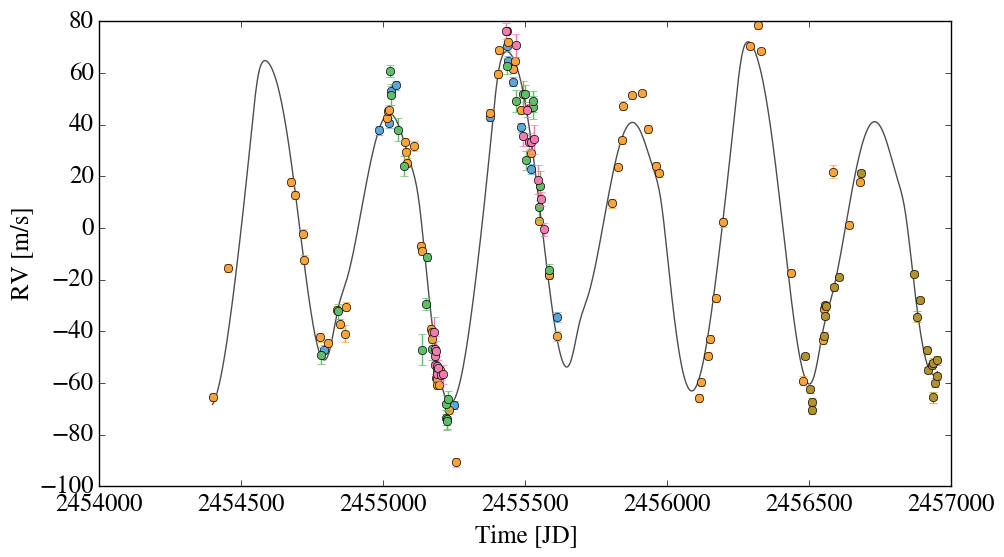

In [2]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

new_params = np.loadtxt('opt_per_mass_from_rmc')
ecc_tmp = np.loadtxt('ecc_tmp')
ang_params = np.loadtxt('ang_params')
offsets = np.loadtxt('offsets_better')
# offsets = result.x
ecc = [0.03,0,0.37]

HD1502.add_planet(per = new_params[0], mass = new_params[1] , M = ang_params[1], e=ecc[0], pomega = ang_params[2])
HD1502.add_planet(per = new_params[2], mass = new_params[3], M = ang_params[3], e=ecc[1], pomega = ang_params[4])

phi = ang_params[0]
lam_3 = 146.84729
pomega_3 = (3*HD1502.planets[0].l - 2*lam_3 - phi)%360.
M_3 = (lam_3 - pomega_3)%360.

HD1502.add_planet(per = new_params[4], mass = new_params[5], M = M_3, e=ecc[2], pomega = pomega_3)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = offsets
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

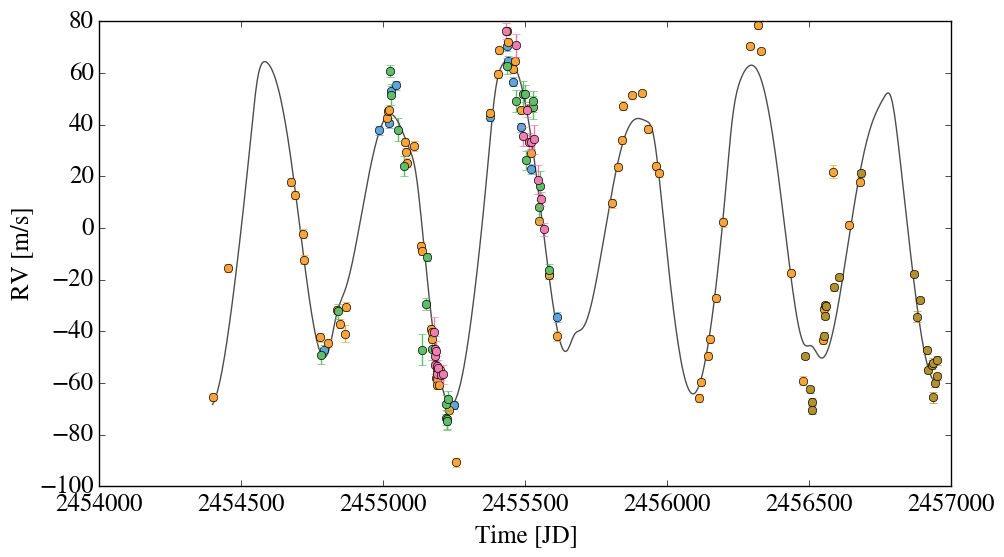

In [3]:
HD1502.plot_RV_kep(epoch=epoch)

In [6]:
print HD1502.calc_chi2(epoch=epoch)/(152-20), HD1502.calc_chi2_kep(epoch=epoch)/(152-20)

26.1433881085 37.1309607101


In [7]:
offsets

array([ 27.75267241,   2.11360448,  16.24621673, -11.3583535 ,  41.65376544])

# Steve's 3 Planet Fit

[ 27.53165823   3.15482132  18.12489594  -8.45294002  41.8709575 ]


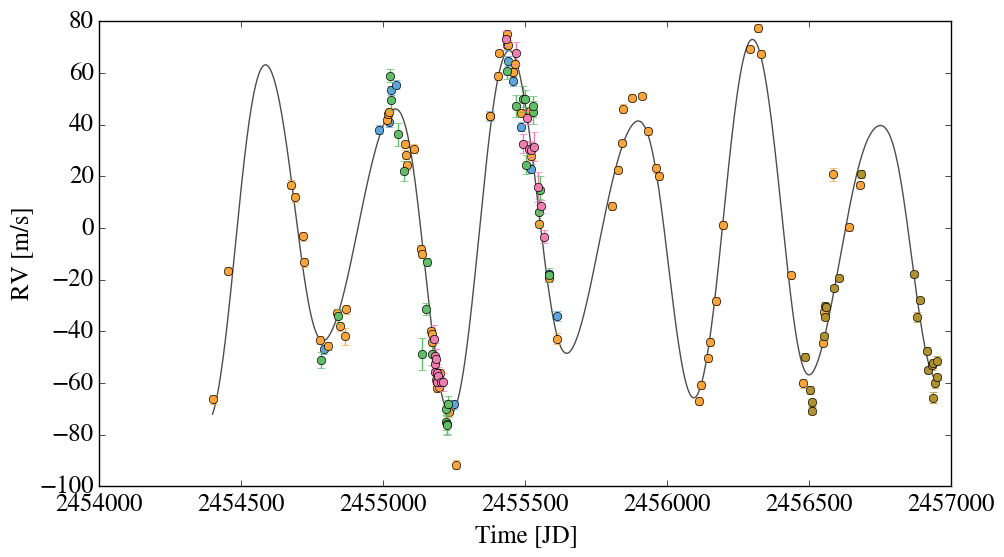

In [37]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454399.8398

HD1502.clear_planets()

HD1502.add_planet(per = 430.59331289, mass = 2.940374 , M = 60.741140, e=0.041800, pomega = 136.847296)
HD1502.add_planet(per = 280.48642221, mass = 0.458721, M = 219.504367, e=0.1, pomega = 316.852223997)
HD1502.add_planet(per = 776.09588310, mass = 0.499935, M = 122.807535, e=0.051500, pomega = 75.245985)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

def opt_offsets(offsets):
    HD1502.offsets = offsets
    return -HD1502.log_like(epoch=epoch)

guess = [24.46196,1.48567,15.50687,-10.69490,37.12315]
result = op.minimize(opt_offsets,guess)
HD1502.offsets = result.x

print result.x

# offsets = np.loadtxt('offsets_better')
# HD1502.offsets = offsets

# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

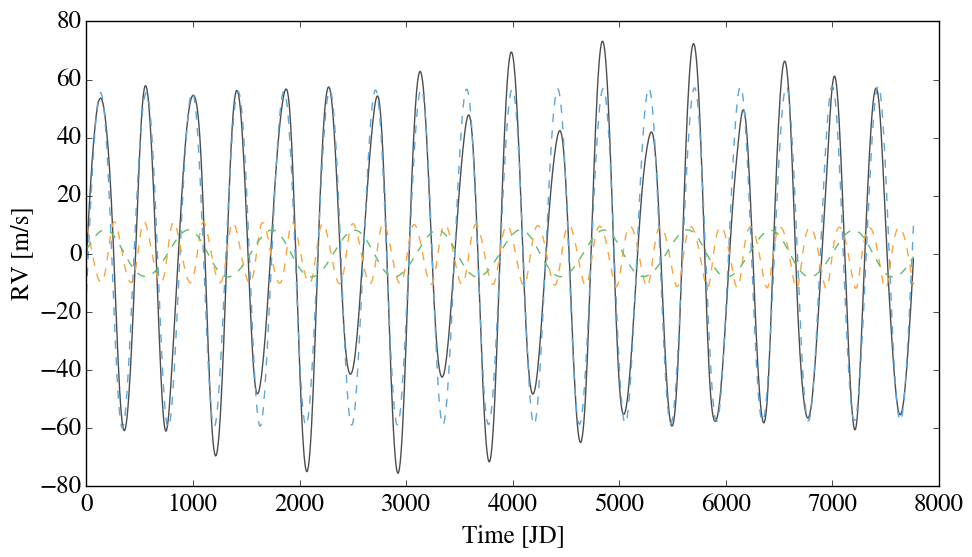

In [38]:
HD1502.plot_planet_RV(epoch=epoch)

In [5]:
HD1502.log_like(epoch=epoch)

-1714.4039919762986

## Check values from MCMC over angles

In [8]:
# phi10, pomega_0, pomega_2 = result_3

# M_0 = 62.77
M_0 = 63.58
# pomega_0 = 139.67
pomega_0 = 138.62
l_0 = M_0 + pomega_0

# phi_10 = -808.72
phi_10 = -814.30
# phi_10 = result.x[0]
# M_1 = 209.50
M_1 = 233.98
pomega_1 = (1./3.)*(-2*M_1 + 3*l_0 - phi_10)

M_2 = 121.16
# pomega_2 = 78.46
pomega_2  = 82.17

print pomega_1

317.646666667


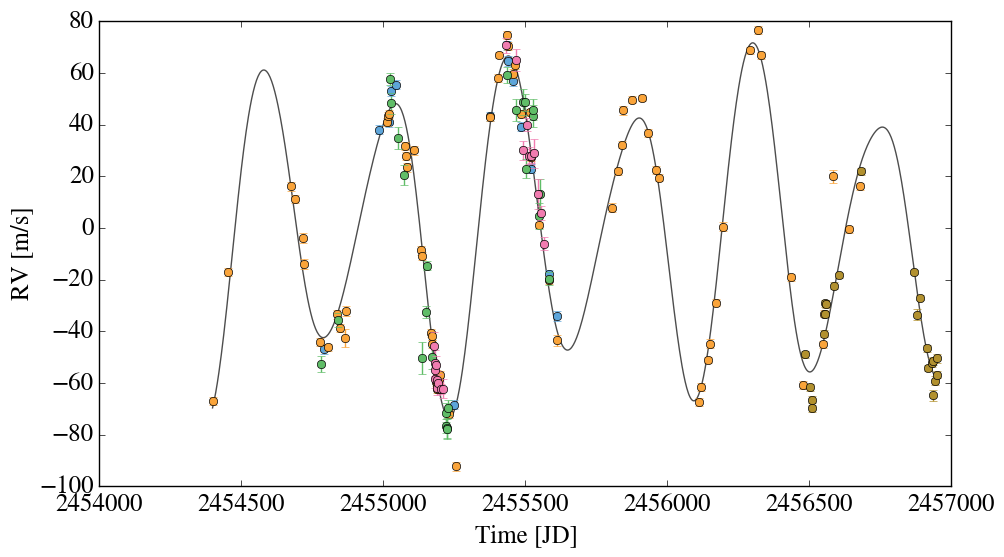

In [9]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454399.8398

HD1502.clear_planets()

# HD1502.add_planet(per = 430.59331289, mass = 2.940374, M = M_0, e=0.041800, pomega = pomega_0)
# HD1502.add_planet(per = 280.48642221, mass = 0.458721, M = M_1, e=0.1, pomega = pomega_1)
# HD1502.add_planet(per = 776.09588310, mass = 0.499935, M = M_2, e=0.051500, pomega = pomega_2)

# HD1502.add_planet(per = 433.16, mass = 2.93, M = M_0, e=10**(-1.35), pomega = pomega_0)
# HD1502.add_planet(per = 278.02, mass = 0.46, M = M_1, e=10**(-0.98), pomega = pomega_1)
# HD1502.add_planet(per = 779.45, mass = 0.49, M = M_2, e=10**(-1.33), pomega = pomega_2)

HD1502.add_planet(per = 432.81, mass = 2.91, M = M_0, e=10**(-1.26), pomega = pomega_0)
HD1502.add_planet(per = 280.51, mass = 0.47, M = M_1, e=10**(-1.09), pomega = pomega_1)
HD1502.add_planet(per = 780.01, mass = 0.49, M = M_2, e=10**(-1.46), pomega = pomega_2)

HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

def opt_offsets(offsets):
    HD1502.offsets = offsets
    return -HD1502.log_like(epoch=epoch)

guess = [24.46196,1.48567,15.50687,-10.69490,37.12315]
result = op.minimize(opt_offsets,guess)
HD1502.offsets = result.x

# offsets = np.loadtxt('offsets_better')
# HD1502.offsets = offsets

# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

In [10]:
HD1502.calc_chi2(epoch=epoch)/(152-20)

20.604323066790592

In [17]:
offsets-result.x

array([ 0.91932171, -0.23624275,  1.01789087, -0.44170039,  1.55603032])

That took  0.971 seconds


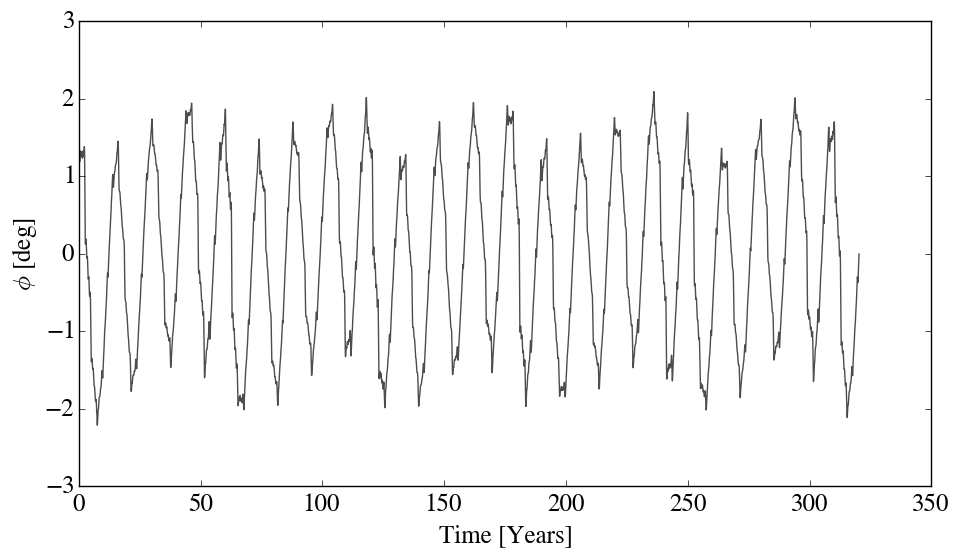

In [31]:
t_0 = time.time()
time_arr, phi_arr = HD1502.plot_phi(pert_ind=0,test_ind=1,p=2,q=1,periods=150)
print "That took  %.3f seconds" %(time.time()-t_0)
phi_arr = phi_arr[:-1]
time_arr = time_arr[:-1]

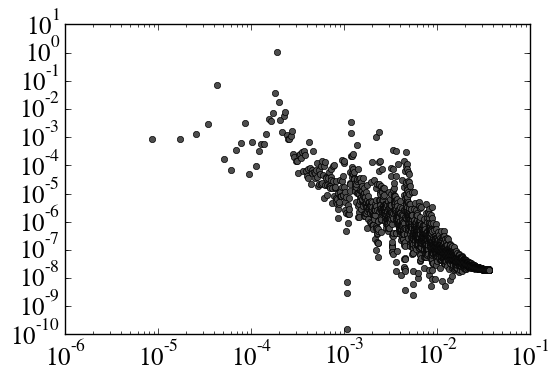

In [25]:
N_phis = len(phi_arr)
fft_phis = rfft(phi_arr)
pow_phis = np.zeros(len(fft_phis))
pow_phis[0] = np.abs(fft_phis[0])**2/N_phis**2

for i in range(1,len(fft_phis)):
        pow_phis[i] = 2*np.abs(fft_phis[i])**2/N_phis**2
        
# freqs = 1./(np.linspace(0,N_phis/2,num=N_phis/2+1)/(N_phis*1))
freqs = np.zeros(N_phis/2+1)
nyq = 1./2./(time_arr[1]-time_arr[0])
for n in range(0,N_phis/2):
    freqs[n] = float(n)/N_phis/(time_arr[1] - time_arr[0])

plt.loglog(freqs,pow_phis,linestyle=' ',marker='o',markersize=5,label="Long Profile")

In [26]:
per_tst = 1./freqs[np.where(pow_phis==np.amax(pow_phis))[0][0]]

In [27]:
def func(x,a,c,d):
    b = 2*np.pi/per_tst
    return a*np.sin(b*x-c)+d

In [28]:
popt, pcov = curve_fit(func, time_arr, phi_arr)

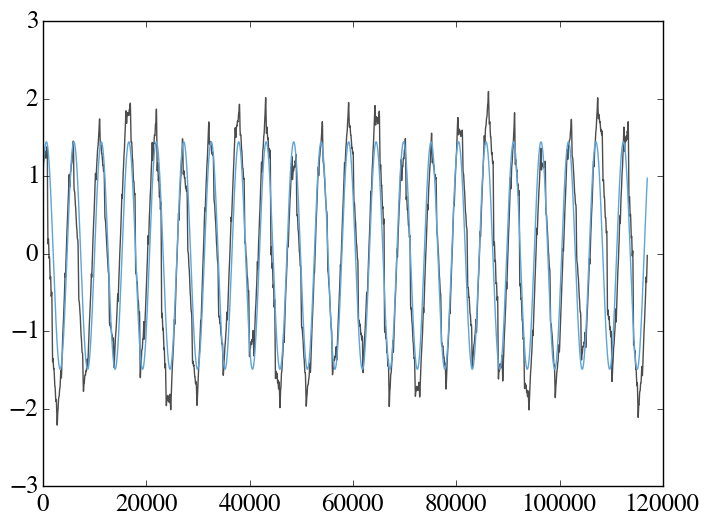

In [29]:
fig = plt.figure(1,figsize=(8,6))
plt.plot(time_arr,phi_arr)
plt.plot(time_arr,func(time_arr, *popt))

In [30]:
popt[0]# len(fft_phis)

1.4673148889711436

In [64]:
phi_arr

[1.4875441214747767,
 1.4458112335759985,
 1.3850836361088774,
 1.3164516777114628,
 1.2572562051846177,
 1.2061890937313962,
 1.1636655889518899,
 1.1360488730895959,
 1.1257285877314089,
 1.1295819956484614,
 1.1423953929043689,
 1.1594782378016131,
 1.1774743968616646,
 1.1942271153963882,
 1.2084007327539736,
 1.2191471564740564,
 1.2258868376631096,
 1.2282067575443403,
 1.2258754185582443,
 1.2189868573668097,
 1.2082352565138912,
 1.1952441047813078,
 1.1827054275826381,
 1.1739399241248059,
 1.1716921403860052,
 1.1766863541438788,
 1.1870437156759621,
 1.1991553142404747,
 1.2093639370478204,
 1.2152586256807645,
 1.2159821200957559,
 1.2117947053008891,
 1.2035154661663974,
 1.1923360413051771,
 1.179815082073489,
 1.1675266042937356,
 1.1567163986899125,
 1.1483470067796269,
 1.1432631106618629,
 1.1422498206359073,
 1.1459403880403869,
 1.154558542361503,
 1.167489121836276,
 1.1827670836858459,
 1.196816442451869,
 1.2050641617242377,
 1.2039172491159764,
 1.19336635074459

In [80]:
def func(x,a,b,c,d):
    return a*np.sin(x/b-c)+d

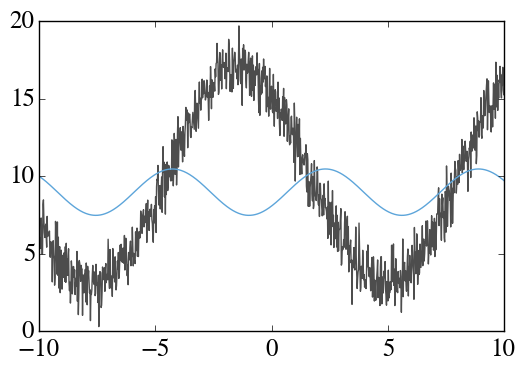

In [88]:
t = np.linspace(-10,10,num=1000)
tst = 7.*np.sin(t/2.-4.)+10.+1e0*np.random.randn(len(t))
plt.plot(t,tst)

popt, pcov = curve_fit(func, t, tst)
plt.plot(t,func(t,*popt))

In [22]:
popt

array([ -1.37039799e+00,   9.97431684e-01,   7.88478923e-04])

 0 %
 9 %
19 %
29 %
39 %
49 %
59 %
69 %
79 %
Integration took 27.79419 seconds
Energy Error is 699.015% 
Planet 1 went unstable


0

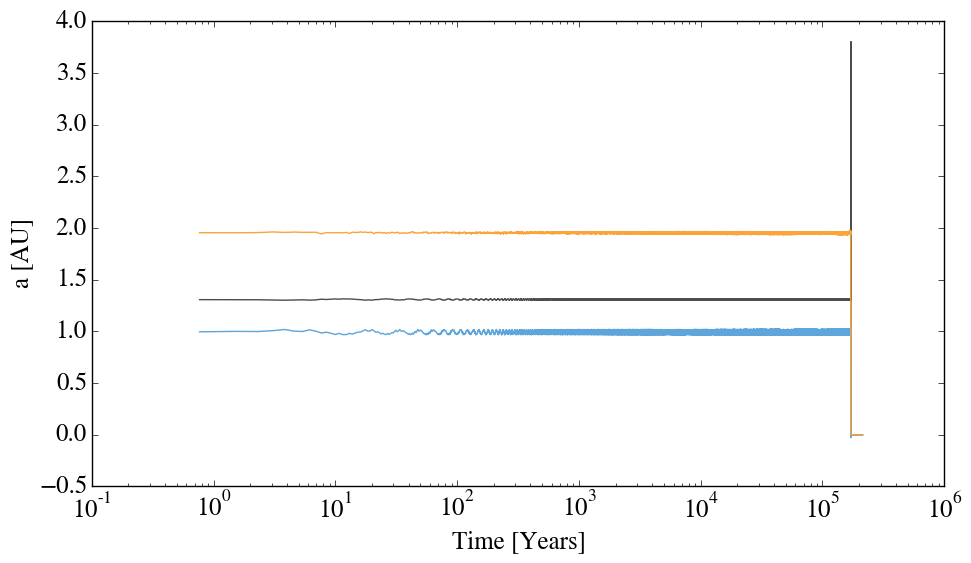

In [13]:
HD1502.orbit_stab(periods=1e5,pnts_per_period=20,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)

In [43]:
phi10 = (3*HD1502.planets[0].l-2*HD1502.planets[1].l - HD1502.planets[1].pomega)
l0 = 60.741140 + 136.847296
l1 = 219.504367 + 316.847280
pomega1 = 3*l0 - 2*l1 - phi10

In [49]:
print (1./3.)*(-2.*219.504367 + 3*l0 - phi10)-316.847280

-240.0


In [44]:
3*l0-2*l1 - 316.847280

-796.7852659999999

# Steve 4 Planet Fit

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


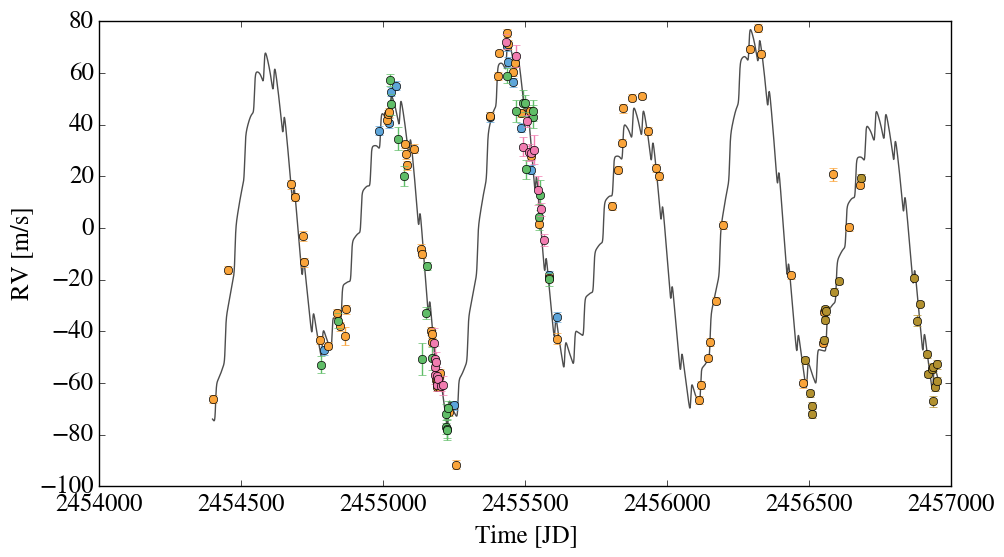

In [3]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454399.8398

HD1502.clear_planets()

HD1502.add_planet(per = 430.59331289, mass = 2.957395 , M = 60.741140, e=0.041800, pomega = 136.847296)
HD1502.add_planet(per = 280.48642221, mass = 0.422739, M = 219.504367, e=0.1, pomega = 316.847280)
HD1502.add_planet(per = 776.09588310, mass = 0.495216, M = 122.807535, e=0.051500, pomega = 75.245985)
HD1502.add_planet(per = 33.91725679, mass = 0.100977, M = 249.084431, e=0.422158, pomega = 260.546413)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

def opt_offsets(offsets):
    HD1502.offsets = offsets
    return -HD1502.log_like(epoch=epoch)

# t_0 = time.time()
# guess = [24.93338,2.03738,16.41142,-10.98964,38.91007]
# result = op.minimize(opt_offsets,guess)
# HD1502.offsets = result.x
# print "That took  %.3f seconds" %(time.time()-t_0)

# offsets = np.loadtxt('offsets_better')
offsets = [27.9308,3.1068,19.8646,-7.2437,43.2642]
HD1502.offsets = offsets

# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch,pnts_per_period=1000)

In [4]:
HD1502.calc_chi2(epoch=epoch)/(152-25)

28.501040303354348

In [79]:
result.x

array([ 26.77568458,   3.28080743,  20.33641296,  -8.02830662,  42.66561848])

# Try minimizing over libration ampltiude

In [140]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454399.8398

HD1502.clear_planets()

HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = [24.46196,1.48567,15.50687,-10.69490,37.12315]
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

In [144]:
60.741140 + 136.847296

197.588436

In [100]:
def min_lib(params,RVsys):
#     print phi
    
    phi, pomega_0, pomega_2 = params
    
    M_0 = 60.741140
#     pomega_0 = 136.847296
    M_1 = 219.504367
    l_0 = 197.588436 #M_0 + pomega_0 from below
    
    pomega_1 = (1./3.) * (-2*M_1 + 3*l_0 - phi)
#     print pomega_1
    
    RVsys.clear_planets()

#     RVsys.add_planet(per = 430.59331289, mass = 2.940374 , M = 60.741140, e=0.041800, pomega = 136.847296)
    RVsys.add_planet(per = 430.59331289, mass = 2.940374 , M = 60.741140, e=0.041800, pomega = pomega_0)
    RVsys.add_planet(per = 280.48642221, mass = 0.458721, M = 219.504367, e=0.1, pomega = pomega_1)
#     RVsys.add_planet(per = 776.09588310, mass = 0.499935, M = 122.807535, e=0.051500, pomega = 75.245985)
    RVsys.add_planet(per = 776.09588310, mass = 0.499935, M = 122.807535, e=0.051500, pomega = pomega_2)

    time_arr, phi_arr = RVsys.plot_phi(pert_ind=0,test_ind=1,p=2,q=1,periods=25,plot=0)
    
    if len(time_arr) % 2 != 0:
        phi_arr = phi_arr[:-1]
        time_arr = time_arr[:-1]
        
    N_phis = len(phi_arr)
    fft_phis = rfft(phi_arr)
    pow_phis = np.zeros(len(fft_phis))
    pow_phis[0] = np.abs(fft_phis[0])**2/N_phis**2

    for i in range(1,len(fft_phis)):
            pow_phis[i] = 2*np.abs(fft_phis[i])**2/N_phis**2
            
    freqs = np.zeros(N_phis/2+1)
        
    for n in range(0,N_phis/2):
        freqs[n] = float(n)/N_phis/(time_arr[1] - time_arr[0])

    per_max_pow = 1./freqs[np.where(pow_phis==np.amax(pow_phis))[0][0]]
    
    def sine_fit(x,a,c,d):
        b = 2*np.pi/per_max_pow
        return a*np.sin(b*x-c)+d
    
    popt, pcov = curve_fit(sine_fit, time_arr, phi_arr)
    return np.abs(popt[0])


In [101]:
t_0 = time.time()
guess = [-796.800098,136.847296,75.245985]
print min_lib(guess,HD1502)
print "That took  %.3f seconds" %(time.time()-t_0)

0.912194896355
That took  0.095 seconds


In [102]:
result = op.minimize(min_lib,guess,args=(HD1502))

In [103]:
result.x

array([-796.80009799,  136.847296  ,   75.245985  ])

In [263]:
def min_lib_grey(params,RVsys):
    phi, pomega_0, pomega_2 = params
    
    M_0 = 62.77
#     pomega_0 = 139.67
    l_0 = M_0 + pomega_0

#     phi_10 = -808.72
# phi_10 = result.x[0]
    M_1 = 209.50
    pomega_1 = (1./3.)*(-2*M_1 + 3*l_0 - phi)

    M_2 = 121.49

    
#     pomega_1 = (1./3.) * (-2*M_1 + 3*l_0 - phi)
#     print pomega_1
    
    RVsys.clear_planets()

#     HD1502.add_planet(per = 430.59331289, mass = 2.940374, M = M_0, e=0.041800, pomega = pomega_0)
#     HD1502.add_planet(per = 280.48642221, mass = 0.458721, M = M_1, e=0.1, pomega = pomega_1)
#     HD1502.add_planet(per = 776.09588310, mass = 0.499935, M = M_2, e=0.051500, pomega = pomega_2)

    RVsys.add_planet(per = 433.16, mass = 2.93, M = M_0, e=10**(-1.35), pomega = pomega_0)
    RVsys.add_planet(per = 278.02, mass = 0.46, M = M_1, e=10**(-0.98), pomega = pomega_1)
    RVsys.add_planet(per = 779.45, mass = 0.49, M = M_2, e=10**(-1.33), pomega = pomega_2)

    time_arr, phi_arr = RVsys.plot_phi(pert_ind=0,test_ind=1,p=2,q=1,periods=200,plot=0)
    
    if len(time_arr) % 2 != 0:
        phi_arr = phi_arr[:-1]
        time_arr = time_arr[:-1]
        
    N_phis = len(phi_arr)
    fft_phis = rfft(phi_arr)
    pow_phis = np.zeros(len(fft_phis))
    pow_phis[0] = np.abs(fft_phis[0])**2/N_phis**2

    for i in range(1,len(fft_phis)):
            pow_phis[i] = 2*np.abs(fft_phis[i])**2/N_phis**2
            
    freqs = np.zeros(N_phis/2+1)
        
    for n in range(0,N_phis/2):
        freqs[n] = float(n)/N_phis/(time_arr[1] - time_arr[0])

    per_max_pow = 1./freqs[np.where(pow_phis==np.amax(pow_phis))[0][0]]
    
    def sine_fit(x,a,c,d):
        b = 2*np.pi/per_max_pow
        return a*np.sin(b*x-c)+d
    
    popt, pcov = curve_fit(sine_fit, time_arr, phi_arr)
    return np.abs(popt[0])


In [267]:
t_0 = time.time()
# guess = [-801.72,138.67,78.46]
guess = result_3
print min_lib_grey(guess,HD1502)
print "That took  %.3f seconds" %(time.time()-t_0)

1.2437962757
That took  0.587 seconds


In [265]:
result = op.minimize(min_lib_grey,guess,args=(HD1502))

In [266]:
result_3 = result.x
result.x

array([-800.46736116,  141.38921805,   76.43406909])

# Try MCMC? 

In [32]:
phi_fft = rfft(phi_arr)

In [35]:
print phi_fft
print len(phi_arr),len(phi_fft)

[-174.00712107 +0.00000000e+00j -173.36465880 +2.17954408e+01j
 -169.31444656 +2.57931522e+01j ...,    0.83710578 -3.76450293e-03j
    0.82568716 -3.88695353e-03j    0.83191869 -6.28409196e-03j]
8341 4171


# Greymalkin $10^5$ year stabilitiy MCMC

322.026666667
[ 27.39180185   3.67719401  19.19973442  -6.64058024  41.59309993]


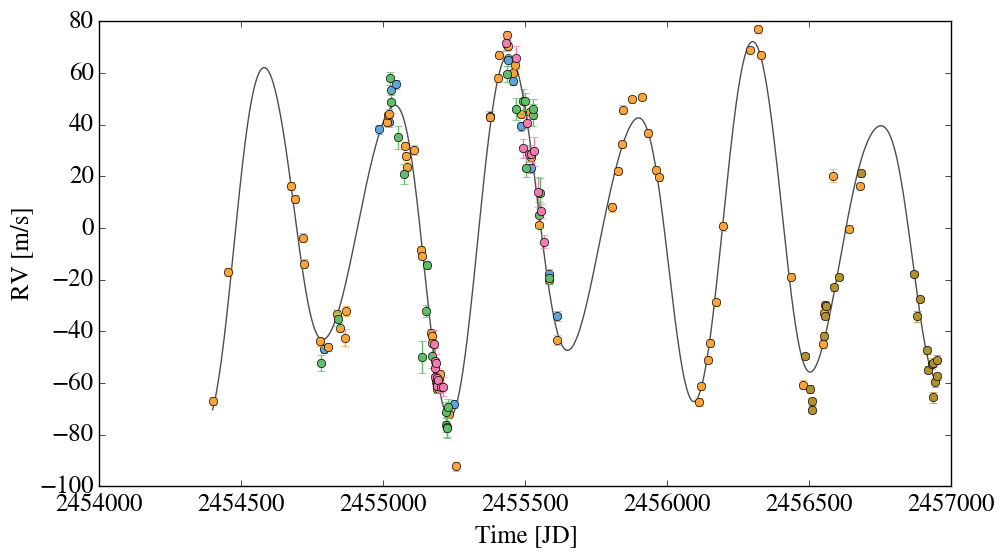

In [10]:
i = 0 

t_0 = time.time()

M_0 = 60.08
pomega_0 = 141.6
l_0 = M_0 + pomega_0

phi_10 = -803.94
M_1 = 221.45
pomega_1 = (1./3.)*(-2*M_1 + 3*l_0 - phi_10)

M_2 = 123.17
pomega_2  = 75.28

print pomega_1

HD1502 = RVSystem(mstar = 1.61)
epoch = 2454399.8398

HD1502.clear_planets()

HD1502.add_planet(per = 432.55, mass = 2.94, M = M_0, e=10**(-1.34), pomega = pomega_0)
HD1502.add_planet(per = 279.31, mass = 0.45, M = M_1, e=10**(-1.00), pomega = pomega_1)
HD1502.add_planet(per = 779.34, mass = 0.50, M = M_2, e=10**(-1.36), pomega = pomega_2)

HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

def opt_offsets(offsets):
    HD1502.offsets = offsets
    return -HD1502.log_like(epoch=epoch)

guess = [24.46196,1.48567,15.50687,-10.69490,37.12315]
result = op.minimize(opt_offsets,guess)
HD1502.offsets = result.x

print result.x

# offsets = np.loadtxt('offsets_better')
# HD1502.offsets = offsets

# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

In [3]:
HD1502.calc_chi2(epoch=epoch)/(152-20)

20.890898206223881

 0 %
Integration took 5.24089 seconds
Energy Error is 223.166% 
Planet 1 went unstable


0

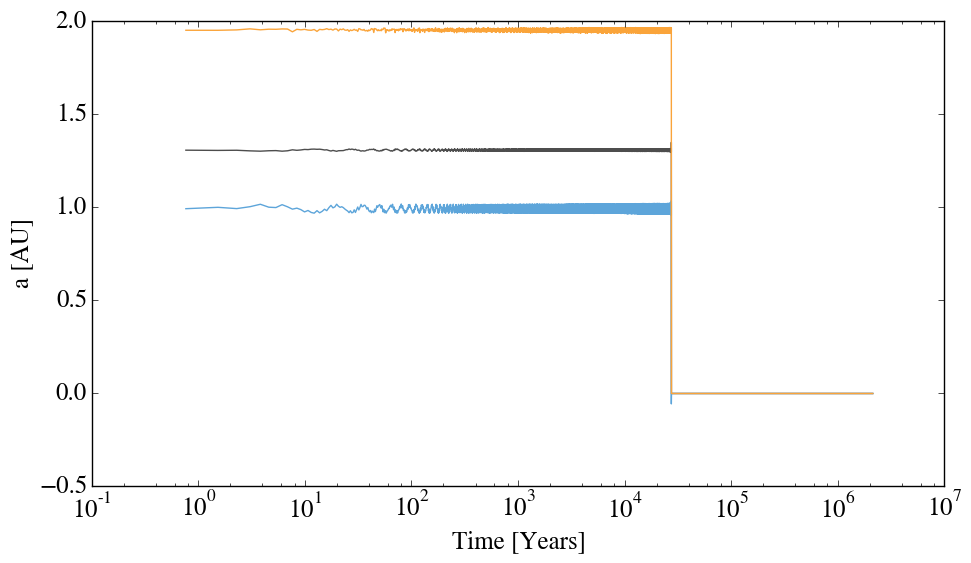

In [9]:
HD1502.orbit_stab(periods=1e6,pnts_per_period=40,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)

In [17]:
HD1502.stab_logprob(epoch=epoch,pnts_per_period=40,periods=1e5)

-inf

In [10]:
-803.94%360

276.05999999999995